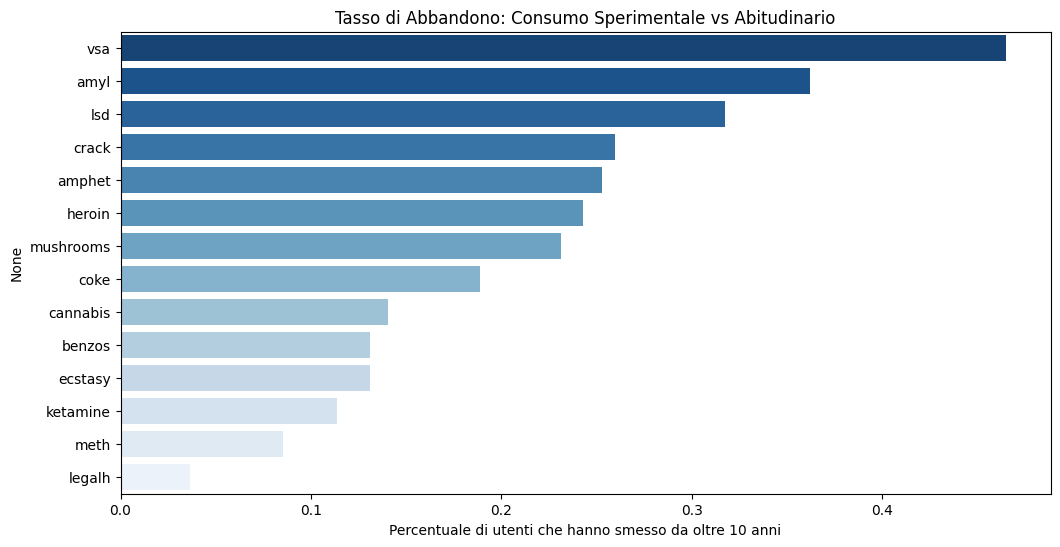

In [1]:
!pip install ucimlrepo -q
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import warnings

# Disattiva tutti i warning
warnings.filterwarnings('ignore')

drug_consumption = fetch_ucirepo(id=373)
targets_numeric = drug_consumption.data.targets.copy()

excluded_drugs = ['alcohol', 'caff', 'choc', 'nicotine', 'semer']
gateway_score = {}

for drug in targets_numeric.columns:
    if drug in excluded_drugs:
        continue

    users = targets_numeric[drug].isin(['CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    long_term_users = targets_numeric[drug] == 'CL1'

    if users.sum() > 0:
        score = long_term_users.sum() / users.sum()
        gateway_score[drug] = score

gateway_df = pd.Series(gateway_score).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gateway_df.values, y=gateway_df.index, palette='Blues_r')
plt.title("Tasso di Abbandono: Consumo Sperimentale vs Abitudinario")
plt.xlabel("Percentuale di utenti che hanno smesso da oltre 10 anni")
plt.show()